
# Clustering on Country data (with Python)

In this notebook, we will explore some of the basic capabilities of Python's **scikit-learn** package for the data science's role to work with classification datasets. For numerical analysis of tabular data, we shall use the Pandas package, which includes specific data types and functions for working with two-dimensional tables of data in Python. The Pandas package offers a more convenient structure to work with data - the DataFrame.

*Unsupervised* machine learning techniques involve in training a machine learning model that looks for previously undetected patterns in the data with no pre-existing labels.

*Clustering* is a form of unsupervised machine learning in which you train a model to use the features ***x*** = $[x_1, x_2, x_3, ...]$ to detect local clusters of similarity in the data. For example, you could detect the species of an organism given some physical attributes. If these attributes are significantly different, clusters of different species can be detected. Another example is detecting fraudulant activities if these activities if these activities are significantly different from normal activities.

In this tutorial, we shall use the Country Dataset, extracted from [kaggle](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data). HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

Contents:
- Explore and preprocess data
- Train clustering models using **scikit-learn** machine learning models
- Save your model and inference new cases.
- Appendix 1: Other file formats

What you will learn:
- Exploring and preprocessing data for training clustering machine learning models.
- Explore the different off-the-shelf clustering machine learning models of **scikit-learn**.
- Save the trained machine learning model and import it to make new predictions.

Source:
- [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics)
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Matplotlib documentation](https://matplotlib.org/3.3.2/contents.html)
- [User guide of Scikit-learn](https://scikit-learn.org/stable/user_guide.html)

## Explore and preprocess data

Let us import the Country Dataset. The dataset is saved in the folder *online-data* in *csv-format*. This is a common data format where the information is delimited using a symbol such as **,** or **;**.

To import this data as a Pandas DataFrame into the memory of Python, the **read_csv** method can be used from the Pandas package. In this method, you need to provide which **delimiter** that is used in the dataset and whether a **header** is present. The header can contain schema information what the number of the data represents. More information on Pandas DataFrame can be found in the [Pandas documentation](https://pandas.pydata.org/docs/).

In [ ]:
import pandas as pd

# load the training dataset
country = pd.read_csv('Country-data.csv', delimiter=',', header='infer')
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


We observe that we have data on 167 countries and that the first column contains information on which country it is.
Also, 9 real-valued features are given:
- *child_mort*: Death of children under 5 years of age per 1000 live births.
- *exports*: Exports of goods and services per capita. Given as %age of the GDP per capita.
- *health*: Total health spending per capita. Given as %age of GDP per capita.
- *imports*: Imports of goods and services per capita. Given as %age of the GDP per capita.
- *income*: Net income per person.
- *inflation*: The measurement of the annual growth rate of the Total GDP.
- *life_expec*: The average number of years a new born child would live if the current mortality patterns are to remain the same.
- *total_fer*: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- *gdpp*: The GDP per capita. Calculated as the Total GDP divided by the total population.

Let us descibe the features statistically. This can be done using the **describe** method of the Pandas DataFrame,

In [ ]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes. This may require some work
- to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values),
- deriving new feature columns by transforming or combining existing features (a process known as *feature engineering*),
- *normalizing* numeric features (values you can measure or count) so they're on a similar scale,
- and *encoding* categorical features (values that represent discrete categories) as numeric indicators.

For example, we observe that the *income* column of the dataset contains way larger values compared to the *total_fer*. These are also quite different things to compare. To eliminate this so-called *unit dependency*, we shall scale the features using a MinMax scaler. This scaler scales the features to lie between zero and one by considering the maximum and minimum value of the feature. Conceptually,
$$scaled\_feature = \frac{feature - min(feature)}{max(feature) - min(feature)}.$$

For more information, you can consult the [scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the numeric features so they're on approximately the same scale
features = MinMaxScaler().fit_transform(country[country.columns[1::]])
features = pd.DataFrame(features, columns = country.columns[1::])
features.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The intermediate tranformation back to DataFrames was needed because the *MinMaxScaler* returns an array.

Now, let us visualize the dataset for local clusters. However, we have 9 features here. To visualize these 9 features on a 2-dimensional (2D) plane (you computer screen), we could use a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the 9-dimensional feature values into 2D coordinates. Then, we plot these 2D points using a scatter plot. This can be done using the **scatter** method of **matplotlib**.

For more information, you can consult the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

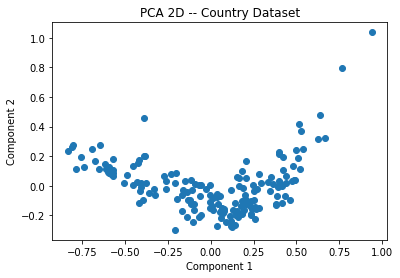

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get two principal components
pca = PCA(n_components=2).fit(features)
features_2d = pca.transform(features)

# Plot a scatter plot
%matplotlib inline
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA 2D -- Country Dataset')
plt.show()

We observe that there is one big cluster at the center, but that there are two clusters that deviate from this main cluster. These two clusters can be interpreted as very rich countries or very poor countries.

## Train clustering models using **scikit-learn** machine learning models

The next step is to use a clustering algorithm of **scikit-learn** to learn a model that assigns a country to a particular cluster. For example, we could use the off-the-shelf *k-means* clustering algorithm to determine this model. Given the number of clusters *k*, the algorithm has the following steps:

1. A set of K centroids are randomly chosen.
2. Clusters are formed by assigning the data points to their closest centroid.
3. The means of each cluster is computed and the centroid is moved to the mean.
4. Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when each new iteration results in negligable movement of centroids and the clusters become static.
5. When the clusters stop changing, the algorithm has *converged*, defining the locations of the clusters - note that the random starting point for the centroids means that re-running the algorithm could result in slightly different clusters, so training usually involves multiple iterations, reinitializing the centroids each time, and the model with the best WCSS is selected.

From the observations of the scatter plot, let us take 3 clusters to begin with.

In [ ]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
n = 3
model = KMeans(n_clusters=n, init='k-means++', n_init=100, max_iter=1000)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)

# View the cluster assignments
km_clusters

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

> **Remark**: Observe that the k-means clustering is applied on the 9-dimensional feature space, not on the 2-dimensional PCA components.

We can plot these assignments in a scatter plot. Like this,

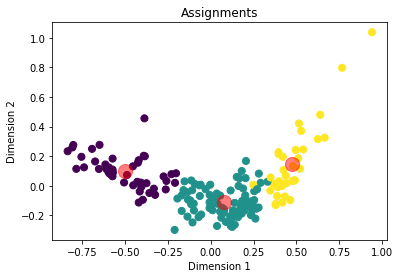

In [ ]:
# Scatter plot, but indicating the clusters
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=km_clusters, s=50,cmap='viridis')

# Extract the centers of the model and project onto the 2D PCA space
centers = model.cluster_centers_
centers_2d = pca.transform(centers)

plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Assignments')
plt.show()

We could also try for 4 clusters,

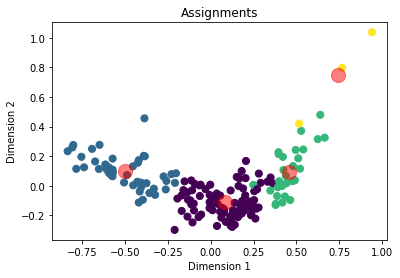

In [ ]:
# Create a model based on 4 centroids and plot results
n = 4
model = KMeans(n_clusters=n, init='k-means++', n_init=100, max_iter=1000)
km_clusters = model.fit_predict(features.values)
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=km_clusters, s=50,cmap='viridis')
centers = model.cluster_centers_
centers_2d = pca.transform(centers)

plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Assignments')
plt.show()

We observe that now, there is a new cluster at the far upper-right of the scatter plot. However, other than that, no real differences are observed in the clustering of the countries.

Nice, but which cluster correspond to which countries? This can be displayd using the following code cell,

In [ ]:
# Display the countries in each cluster
for c in range(0, n):
    print("Cluster {}:".format(c+1))
    print(country['country'][km_clusters == c].tolist(), '\n')

Cluster 1:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailan

We thus observe that one of the clusters correspond to *very poor countries* and financial aid might be interesting for these countries. This looks already quite promising. However, to observe that there are three clusters is quite arbitrary. How can we determine the number of clusters in the dataset in a more mathematical way?

## Clustering metrics

One way to determine the number of clusters is to repeat the clustering algorithm on a few cluster numbers and to calculate the *within cluster sum of squares* (WCSS). This is a measure of how tightly the data points are grouped within each cluster.

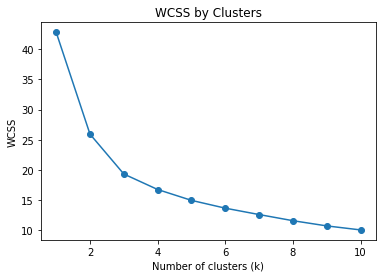

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    # Fit the data points
    km.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(km.inertia_)

# Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss, marker = "o")
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Save your model and inference new cases

We have tried several clustering algorithms for our clustering dataset. You might have observed that no explicit model is constructed as in the case of *regression* and *classification* machine learning problems: the concept of saving a 'model' for future inference does not make sense in clustering methods as there is no label to predict.

However, for the case of kmeans, what you could do is save the information of the centers of the obtained kmeans clustering, and assign new instances to the closest cluster.
This can be done like this,

In [ ]:
import joblib

# Save the model as a pickle file
filename = 'kmeans_model.pkl'
joblib.dump(model, filename)

print("Model saved!")

Model saved!


Now, we can load it whenever we need it, and use it to assign to clusters for new data.

The scenario might be that measurements of a country has been measured, and we want to assign this new country to one of the clusters determined from the other countries. We do this by assigning this to the closest cluster center. This can be easily done using the **predict** method of the kmeans model.

In [ ]:
import numpy as np

# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing the data on measurements of the new country
X_new = np.array([[23.3, 72.0, 6.84, 81.2, 4495, 12.10, 73.1, 1.95, 1370]]).astype('float64')
print ('New country: {} \n'.format(list(X_new[0])))

# Use the model to assign the cluster
result = loaded_model.predict(X_new)
print('Assigned cluster: {} \n'.format(result[0]))

New country: [23.3, 72.0, 6.84, 81.2, 4495.0, 12.1, 73.1, 1.95, 1370.0] 

Assigned cluster: 3 



## Further Readings

Sources:
- To learn more about Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/user_guide.html).
- To learn more about machine learning basics on other datasets, see the [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics).